In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from collections import defaultdict
np.set_printoptions(threshold=sys.maxsize)

In [459]:
#data = open('../test.txt').readlines()
data = open('input.txt').readlines()
rock_movements = [d.replace('\n', '') for d in data]

matrix = [[0 for _ in range(1000)] for _ in range(600)]

max_depth = 0
max_width = 0
min_depth = 10000
min_width = 10000

for mov in rock_movements:
    previous = None
    cells = mov.split('->')
    for rock in cells:
        x,y = rock.split(',')
        x = int(x)
        y = int(y)
        matrix[y][x] = 100
        #check if y is the new max depth
        if y > max_depth:
            max_depth = y
        if y < max_depth:
            min_depth = y
        if x > max_width:
            max_width = x
        if x < min_width:
            min_width = x
            
        if previous != None:
            if x == previous[0]:
                for i in range(y-previous[1]):
                    m1 = max(y, previous[1])
                    m2 = min(y, previous[1])
                    for i in range(m1 - m2):
                        matrix[m1-i][x] = 100
            elif y == previous[1]:
                m1 = max(x, previous[0])
                m2 = min(x, previous[0])
                for i in range(m1 - m2):
                    matrix[y][m1-i] = 100
        previous = (x,y)

In [460]:
def pour_sand():
    units = 0
    pos = (0,500)
    path = []
    while pos and not pos[0] > max_depth:
        for dx in (0, -1, 1):
            new_pos= (pos[0]+1, pos[1]+dx)
            if matrix[new_pos[0]][new_pos[1]] == 0 and new_pos[0] <= max_depth:
                path.append(pos)
                pos = new_pos
                break
        else:
            matrix[pos[0]][pos[1]] = 50
            pos = path.pop() if path else None
        

In [461]:
pour_sand()

In [462]:
total = 0
for row in matrix:
    total += row.count(50)
total

360

<AxesSubplot:>

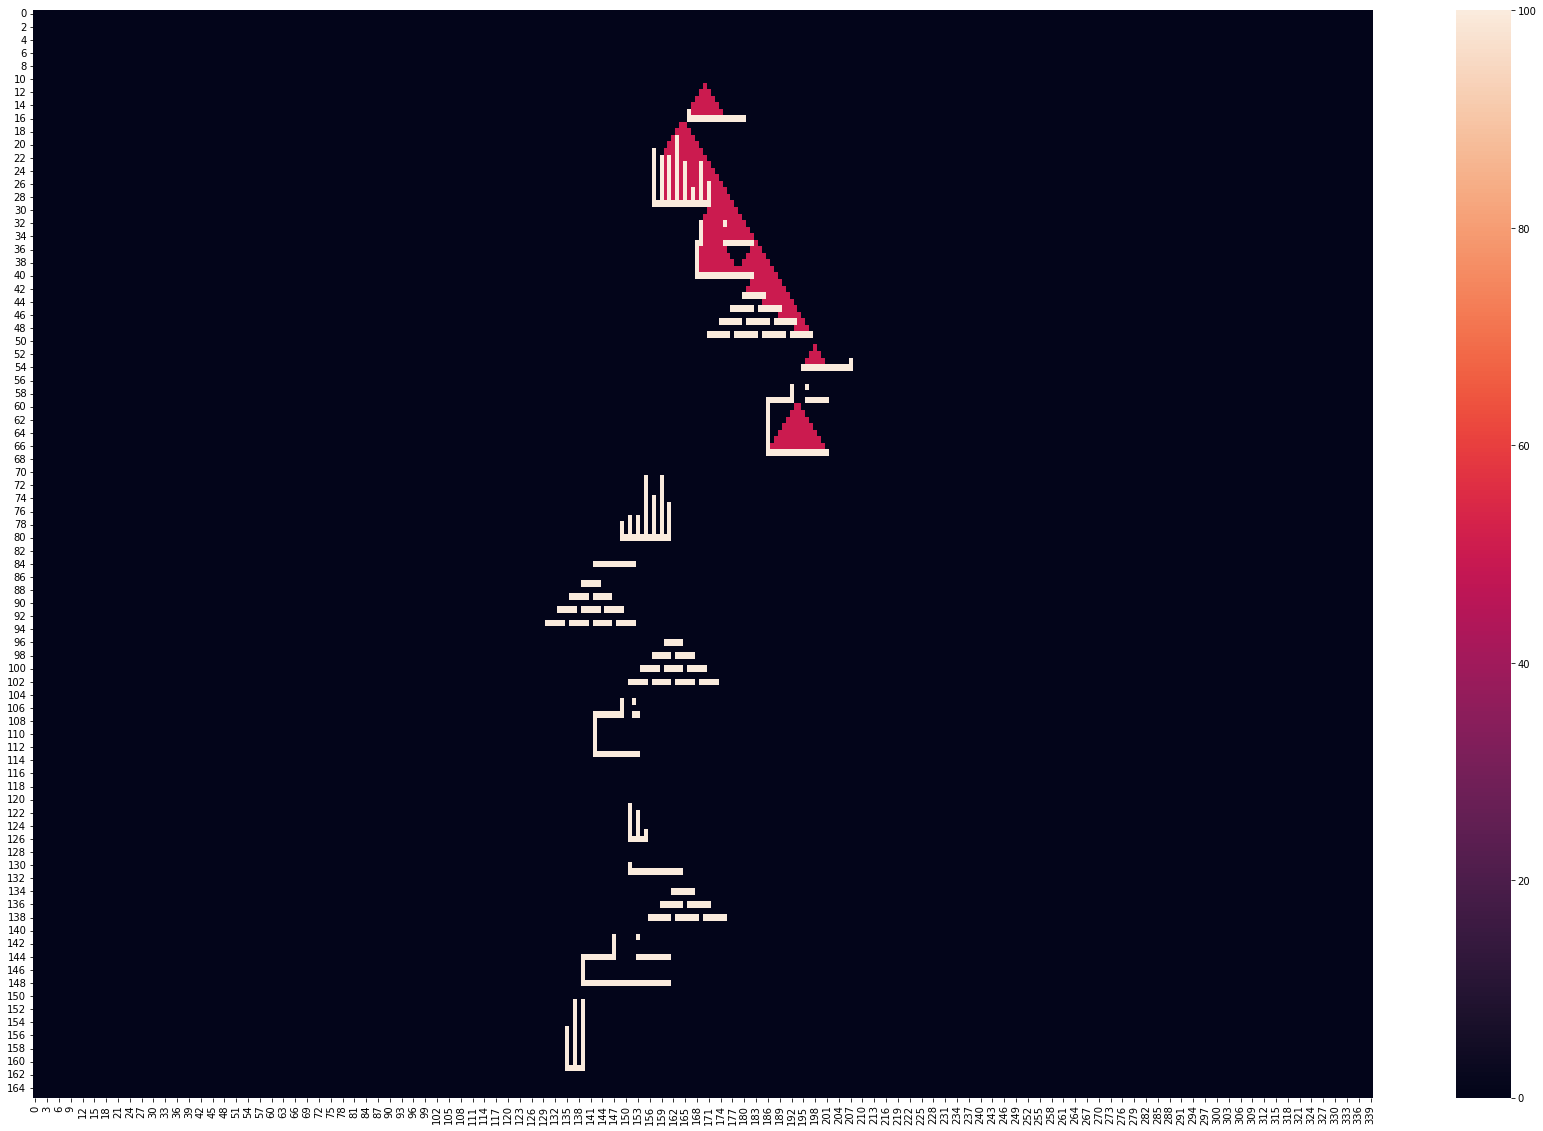

In [463]:
plt.figure(figsize=(30,20))
sns.heatmap([row[330:670] for row in matrix[:max_depth+5]])

In [494]:
air = 0
wall = 1
sand = 2
def moveDown(grid, cur, lowestWall, part2=False):
    next = cur[0], cur[1]+1
    if part2:
        if next[1] == lowestWall:
            grid[next] = wall
            grid[next[0]+1, next[1]] = wall
            grid[next[0]-1, next[1]] = wall
    if grid[next] == air:
        if cur[1] > lowestWall:
            return False
    else:
        next = cur[0]-1, cur[1] + 1
        if grid[next] != air:
            next = cur[0]+1, cur[1]+1
            if grid[next] != air:
                grid[cur] = sand
                return cur
    return moveDown(grid, next, lowestWall, part2)
                      
with open('input.txt', 'r') as inputFile:
    origGrid = defaultdict(int)
    source = (500,0)
    walls = inputFile.read().splitlines()
    for w in walls:
        ws = w.split(' -> ')
        prev = None
        for cur in ws:
            x, y = map(int, cur.split(','))
            if prev != None:
                r = range(prev[1], y+1) if prev[1] < y else range(prev[1], y-1,-1)
                for yi in r:
                    origGrid[x,yi] = wall
                r = range(prev[0], x+1) if prev[0] < x else range(prev[0], x-1,-1)
                for xi in r:
                    origGrid[xi, y] = wall
            prev = (x,y)
    lowestWall = max([k[1] for k in origGrid.keys()])
    grid = origGrid.copy()
    while moveDown(grid, source, lowestWall+2, part2=True) != source:
        pass
    print(list(grid.values()).count(sand))

24659


In [495]:
matrix = [[0 for _ in range(1000)] for _ in range(600)]
for pair in grid.items():
    if type(pair[0]) != int:
        matrix[pair[0][1]][pair[0][0]] = pair[1]

<AxesSubplot:>

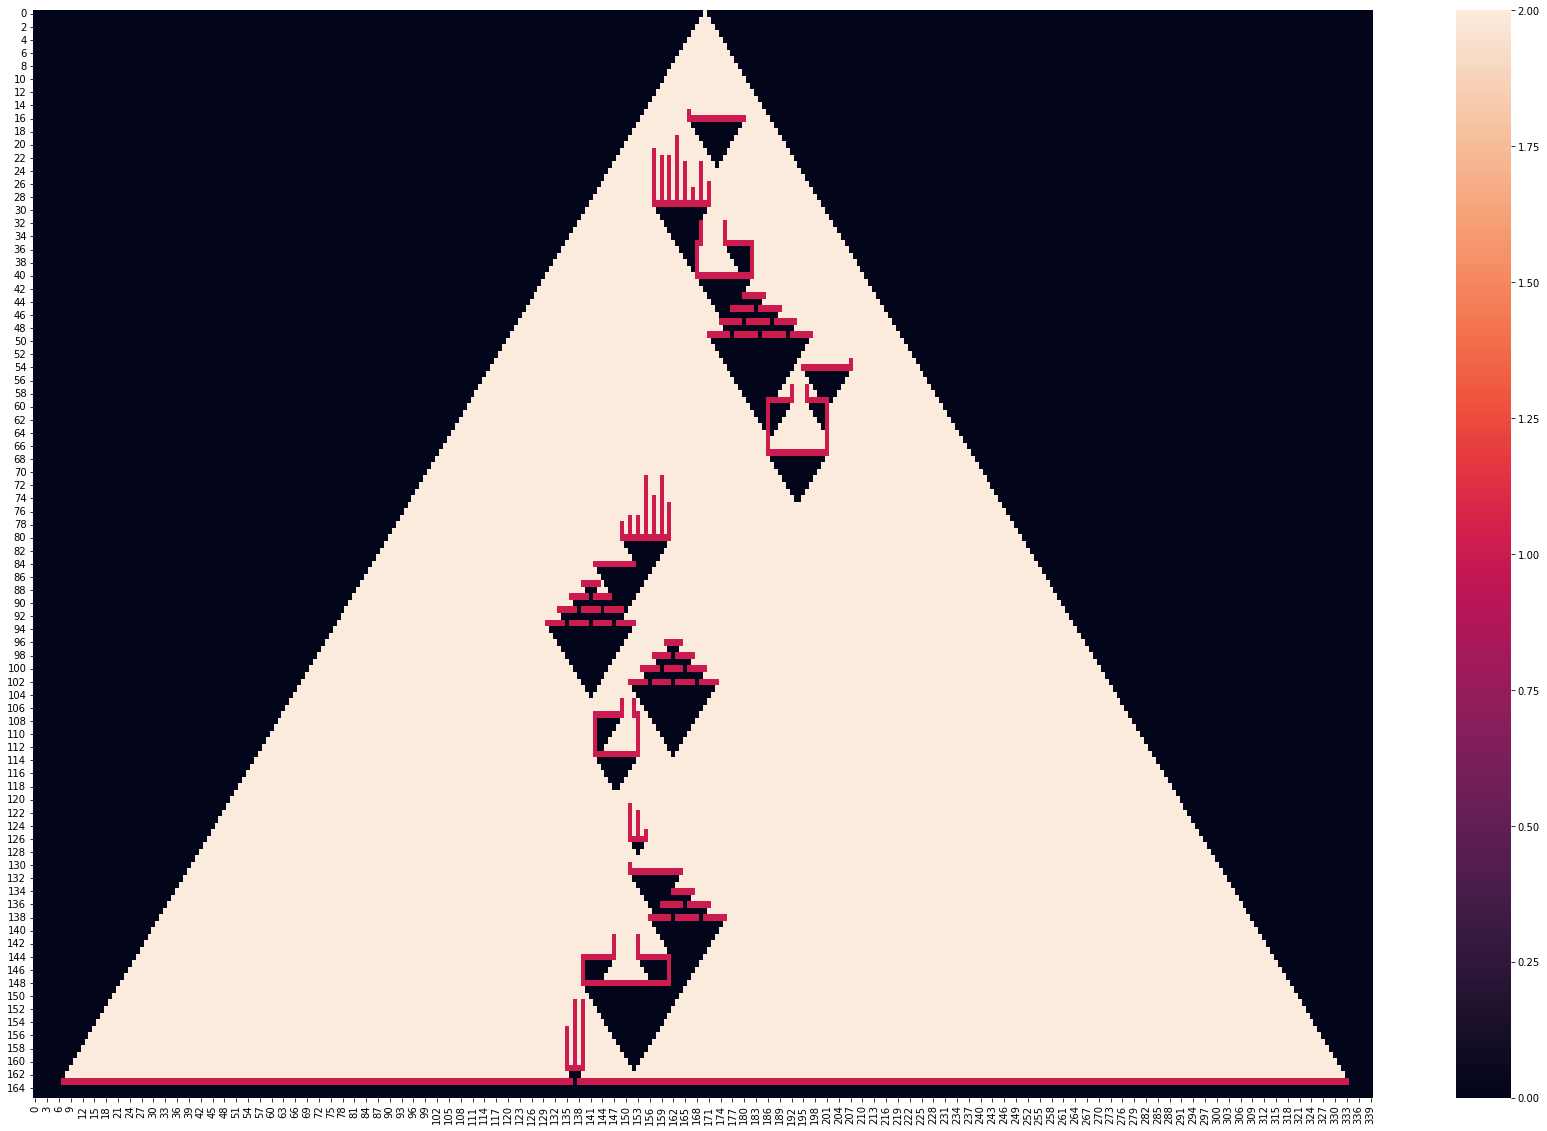

In [496]:
plt.figure(figsize=(30,20))
sns.heatmap([row[330:670] for row in matrix[:max_depth+5]])